#Programming Lab 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

##Q1)

In [2]:
# Create two normal distributions
n1 = np.random.normal(loc = -10, scale = 5, size = 1000)
n2 = np.random.normal(loc = 10, scale = 5, size = 1000)


###a)

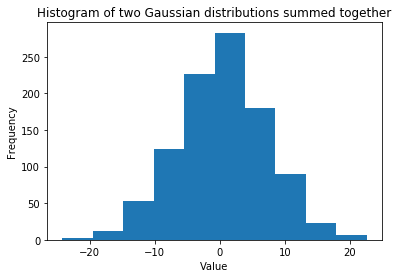

estimated mean of the new distribution is: 0.3296776340939624
estimated variance of the new distribution is: 47.58168103625169


In [3]:
# take the sum of 2 gaussians by adding two sets of 1000 points, point by point
n_sum = n1 + n2

# plot in a histogram
plt.hist(n_sum)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of two Gaussian distributions summed together")
plt.show()

#estimate mean and variance of sum
mean = np.mean(n_sum, dtype=np.float64)
print("estimated mean of the new distribution is: " + str(mean))
var = np.var(n_sum, dtype=np.float64)
print("estimated variance of the new distribution is: " + str(var))

##Q2)

In [4]:
# define Xi random variable (iid Bernoulli ({-1,1})
middle = 0.5
Xi = np.random.uniform()
# hello